In [3]:
import sys
import os
sys.path.insert(0, f'{os.getenv("HOME")}/Devel/simgio/PYsimgio/')

import simgio_utils as su
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
def define_marker(mu):
    if mu == 10:
        return 'o'
    elif mu == 100:
        return 'v'
    elif mu == 1000:
        return 's'
    else:
        raise(Except(f"mu error! value {mu} not expected!"))

def witer_graphs(df_dict, max_row, max_col, save_to=None):
    
    
    fig, ax = plt.subplots(nrows=max_row, ncols=max_col, figsize=(17, 8))
    
    import matplotlib.markers as mmarkers

    def colors(group_id):
        if group_id == 0:
            return "blue"
        if group_id == 1:
            return 'red'
        elif group_id == 2:
            return 'green'
        elif group_id == 3:
            return 'gold'
        else:
            print(f"outline group_id: {group_id}")
            return 'black'
        
    row = 0
    col = 0

    for key, df in df_dict.items():
        
        # define the marker list
        m = df.mu.apply(lambda x : define_marker(x)).values
        
        # plot the graph
        sub = ax[row,col].scatter(df.witer.values, df.alpha_io.values, 
                            c=df.group_id.apply(lambda x: colors(x)),
                            alpha=0.6)
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
            
        sub.set_paths(paths)
        
        ax[row,col].set_xscale('log')
        
        ax[row, col].set_title(key)
        
        ax[row, col].set_xlabel(r'$w_{iter}$', fontweight='bold', fontsize=14)
        ax[row, col].set_ylabel(r'$\alpha_{io}$', fontsize=14, fontweight='bold')
        col += 1
        if col == max_col:
            col = 0
            row += 1
            
    fig.tight_layout(pad=3.0)
    
    if save_to:
        
        fig.savefig(f'graphs/{save_to}', format='pdf', dpi=1200)
        

    plt.show()

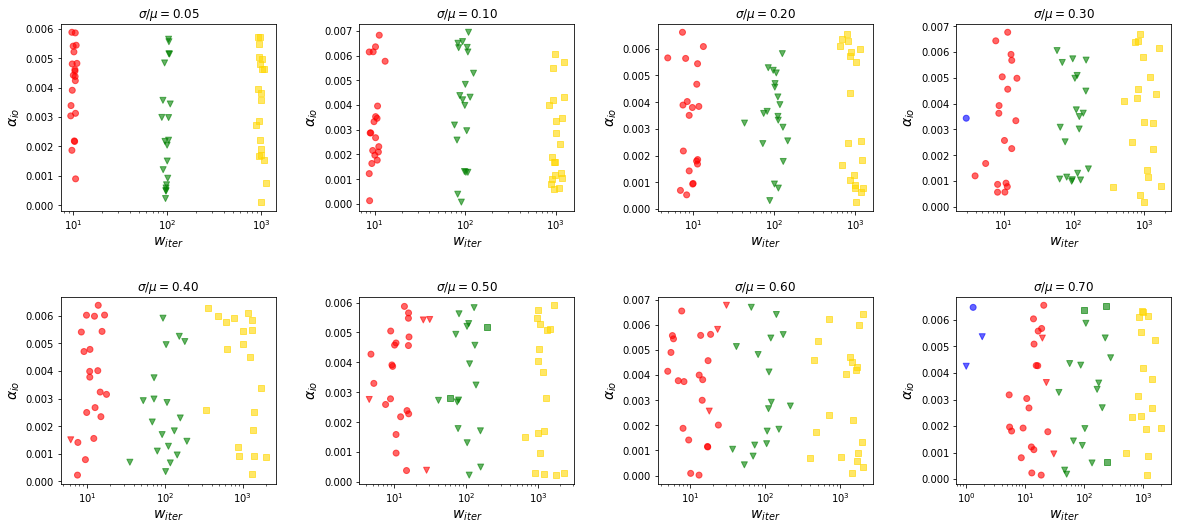

In [17]:
witer_graphs({r"$\sigma/\mu = 0.05$": su.load_app('csv_0.050/app_0.csv'),
              r"$\sigma/\mu = 0.10$": su.load_app('csv_0.100/app_0.csv'),
              r"$\sigma/\mu = 0.20$": su.load_app('csv_0.200/app_0.csv'),
               r"$\sigma/\mu = 0.30$": su.load_app('csv_0.300/app_0.csv'),
              r"$\sigma/\mu = 0.40$": su.load_app('csv_0.400/app_0.csv'),
               r"$\sigma/\mu = 0.50$": su.load_app('csv_0.500/app_0.csv'),
               r"$\sigma/\mu = 0.60$": su.load_app('csv_0.600/app_0.csv'),
              r"$\sigma/\mu=0.70$": su.load_app('csv_0.700/app_0.csv')},
             max_row = 2,
             max_col = 4)

In [6]:
n_executions = 100
n_tasks = 60
priorities = ['Exclusive-FCFS', 'FairShare', 'Set-10']


In [18]:
_ , ev05 = su.load_all(priorities=priorities,  n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.050')  
_ , ev10 = su.load_all(priorities=priorities,  n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.100')  
_ , ev20 = su.load_all(priorities=priorities,  n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.200')
_ , ev30 = su.load_all(priorities=priorities,  n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.300')
_ , ev40 = su.load_all(priorities=priorities,  n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.400')
_ , ev50 = su.load_all(priorities=priorities,  n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.500')
_ , ev60 = su.load_all(priorities=priorities,  n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.600')
_ , ev70 = su.load_all(priorities=priorities,  n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.700')
_ , ev80 = su.load_all(priorities=priorities,  n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.800')
_ , ev90 = su.load_all(priorities=priorities,  n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.900')
_ , ev1_00 = su.load_all(priorities=priorities, n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_1.000')


ev05['sigma'] = 0.05
ev10['sigma'] = 0.10
ev20['sigma'] = 0.20
ev30['sigma'] = 0.30
ev40['sigma'] = 0.40
ev50['sigma'] = 0.50
ev60['sigma'] = 0.60
ev70['sigma'] = 0.70
ev80['sigma'] = 0.80
ev90['sigma'] = 0.90
ev1_00['sigma'] = 1.000


g = {'0.05': ev05,
     '0.10': ev10,
     '0.20': ev20,
     '0.30': ev30,
     '0.40': ev40,
     '0.50': ev50,
     '0.60': ev60,
     '0.70': ev70,     
     '0.80': ev80,
     '0.90': ev90,
     '1.00': ev1_00
    }

FileNotFoundError: [Errno 2] No such file or directory: 'csv_0.700/info_Set-10_74.csv'

In [ ]:
def generate_values(sd, priorities):
    values = []
    for priority in priorities:
        values.append(g[sd].groupby('priority').get_group(priority).max_stretch)
        
    return values   

    

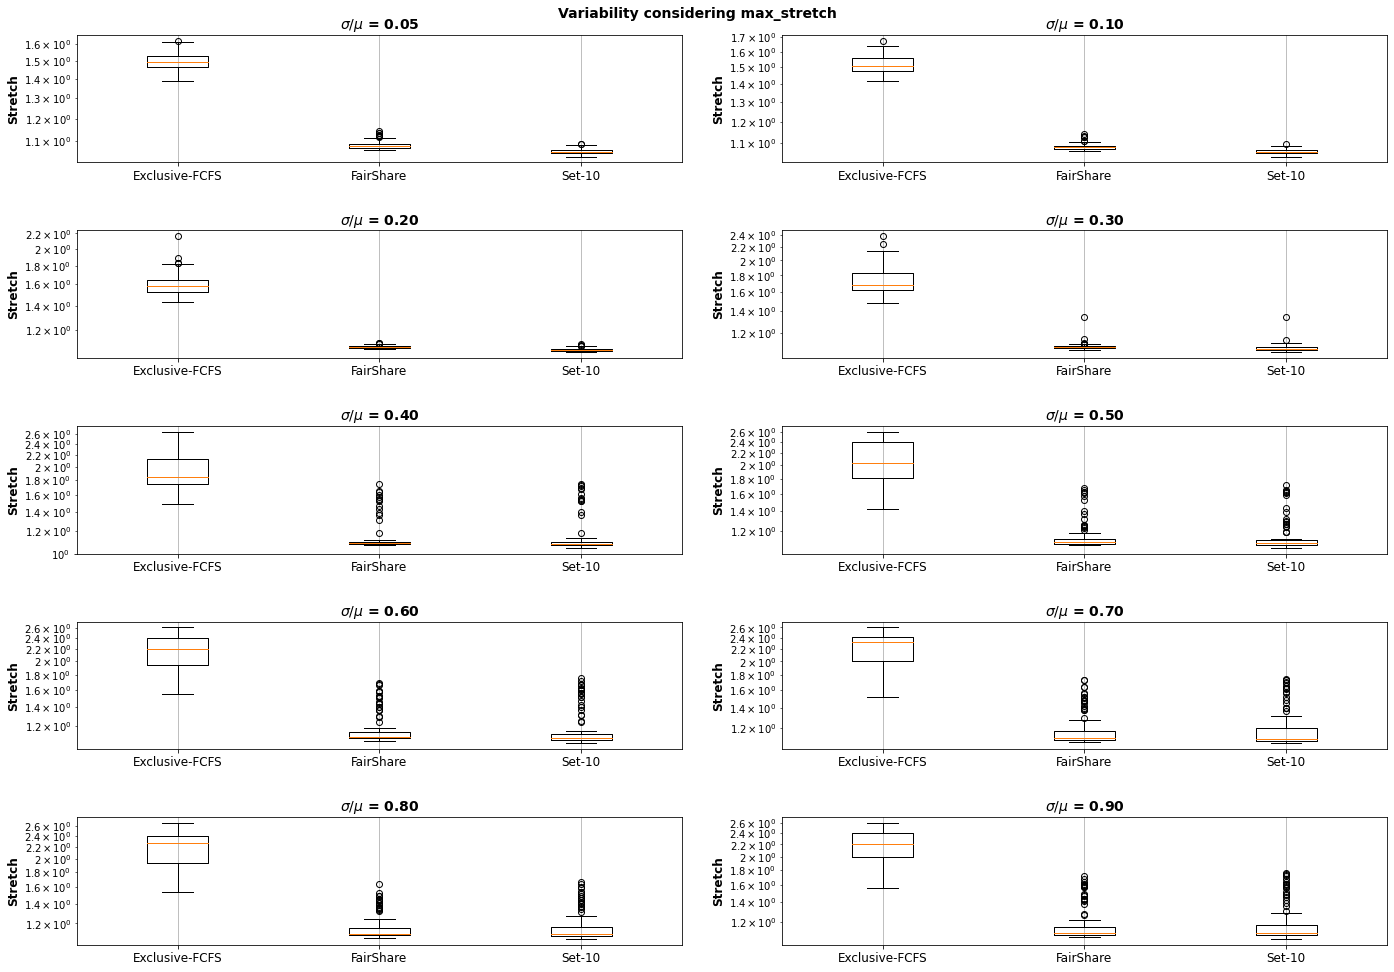

In [ ]:
x_values = ['0.05', '0.10', '0.20', '0.30', '0.40','0.50', '0.60', '0.70', '0.80', '0.90']
priorities = ['Exclusive-FCFS', 'FairShare', 'Set-10']
xlabels = [r'Exclusive-FCFS', 'FairShare', r'Set-10']


max_rows = 5
max_cols = 2

fig, ax = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20, 14))


row = 0
col = 0 

for x in x_values:
    ax[row, col].boxplot(generate_values(x, priorities))

    ax[row,col].set_yscale('log')        
    ax[row, col].set_title(r'$\sigma/\mu$ = ' + x, fontsize=14, fontweight='bold')

    ax[row, col].set_xticklabels(xlabels, fontsize=12)
    ax[row,col].grid()
    
    ax[row, col].set_ylabel(r'Stretch', fontsize=12, fontweight='bold')
    
#     ax[row, col].set_ylim((1.0,1.08))

    col += 1        
    if col == max_cols:
        col = 0
        row += 1 



# plt.grid()

fig.tight_layout(pad=3.0)

fig.suptitle("Variability considering max_stretch", fontsize=14, fontweight='bold')
# plt.legend()

#     if save_to:
# fig.savefig('boxplot_sigma.pdf', format='pdf', dpi=1200)

plt.show()

In [ ]:
variability_values =[0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0]

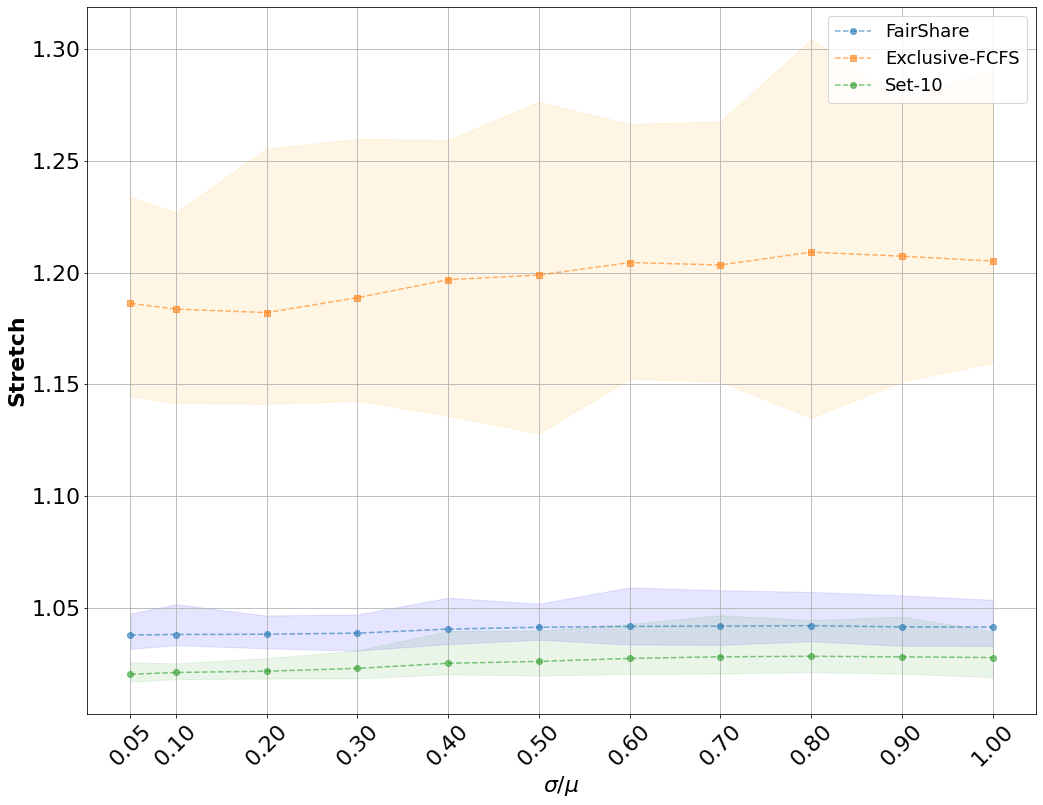

In [ ]:
def generate_values_max(priority):
    mean_values = []
    min_values = []
    max_values = []
    
    ev_list = [ev05, ev10, ev20, ev30, ev40, ev50, ev60, ev70, ev80, ev90, ev1_00]
    
    for ev in ev_list:
        mean_values.append(ev.groupby('priority').get_group(priority).mean_stretch.mean())
        min_values.append(ev.groupby('priority').get_group(priority).mean_stretch.min())
        max_values.append(ev.groupby('priority').get_group(priority).mean_stretch.max())
        
    return min_values, mean_values, max_values
          
fairShare_min,fairShare_mean, fairShare_max = generate_values_max("FairShare")
exclusive_min,exclusive_mean, exclusive_max = generate_values_max("Exclusive-FCFS")
set10_min,set10_mean, set10_max = generate_values_max("Set-10")


fig, ax = plt.subplots(1, figsize=(17, 13))




ax.plot(variability_values, fairShare_mean, 'o--', alpha=0.6, label='FairShare')
ax.fill_between(variability_values, fairShare_min, fairShare_max, color='b', alpha=.1)


ax.plot(variability_values, exclusive_mean, 's--', alpha=0.6, label='Exclusive-FCFS')
ax.fill_between(variability_values, exclusive_min, exclusive_max, color='orange', alpha=.1)

ax.plot(variability_values, set10_mean, 'o--', alpha=0.6, color=su.color_palette['green'], label='Set-10')
ax.fill_between(variability_values, set10_min, set10_max, color=su.color_palette['green'], alpha=.1)


plt.ylabel(r'Stretch', fontsize=22, fontweight='bold')
plt.xlabel(r'$\sigma/\mu$', fontweight='bold', fontsize=22)



# ax.set_yscale('log')
lgnd=plt.legend(prop={'size': 18})
lgnd.legendHandles[0]._sizes = [300]
lgnd.legendHandles[1]._sizes = [300]
lgnd.legendHandles[2]._sizes = [300]
plt.grid()


plt.xticks(variability_values, rotation=45)
# plt.title("Max Stretch", fontweight='bold', fontsize=18)

ax.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(axis='both', which='minor', labelsize=22)

# fig.savefig(f"graphs/sigma.pdf", format='pdf', dpi=1200)

plt.show()

In [ ]:
ev05.loc[ev05.priority == "Set-10"].mean_stretch.mean() /  ev05.loc[ev05.priority == "FairShare"].mean_stretch.mean()

0.9830634246277595

In [ ]:
ev1_00.loc[ev1_00.priority == "Set-10"].mean_stretch.mean() /  ev1_00.loc[ev1_00.priority == "FairShare"].mean_stretch.mean()

0.9869226534811393